## Insect Classification - Initial Image Analysis

In [17]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, MaxPooling2D, LeakyReLU, PReLU, Add
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)
tf.random.set_seed(42)

### Image Size Frequency Analysis - Mobile Corpus

              Mpix Range  Frequency
0       (11.778, 88.555]        387
1      (88.555, 163.754]       1694
2     (163.754, 238.952]       1511
3     (238.952, 314.151]         45
4     (314.151, 389.349]         28
5     (389.349, 464.548]        754
6     (464.548, 539.746]        341
7     (539.746, 614.945]         49
8     (614.945, 690.143]         10
9     (690.143, 765.342]         19
10     (765.342, 840.54]        200
11     (840.54, 915.739]         18
12    (915.739, 990.937]        112
13   (990.937, 1066.136]          4
14  (1066.136, 1141.334]          3
15  (1141.334, 1216.532]        884
16  (1216.532, 1291.731]        208
17  (1291.731, 1366.929]          0
18  (1366.929, 1442.128]          1
19  (1442.128, 1517.326]          0
20  (1517.326, 1592.525]       8102


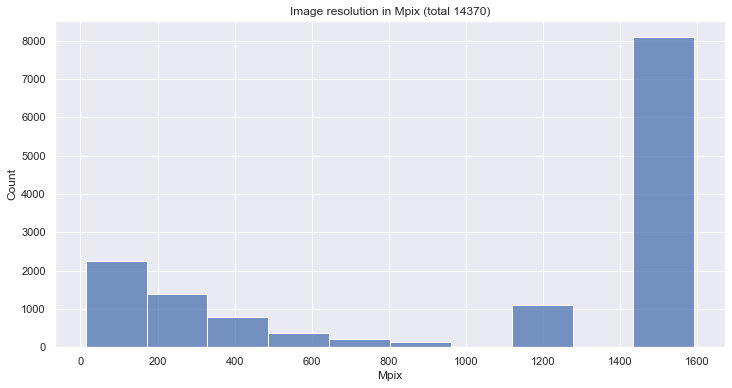

In [22]:
import os
import pandas as pd
from PIL import Image
import seaborn as sns

# Set the path to your dataset
BASE_PATH = "C:\\DL Testing Set"

# Step 1: Image Preprocessing
image = []
labels = []
widths = []
heights = []

for root, dirs, files in os.walk(BASE_PATH):
    for file in files:
        if file.endswith(".jpg"):
            label = os.path.basename(root)
            if label != 'annotations':
                image_path = os.path.join(root, file)

                # Open the image to get its size
                with Image.open(image_path) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)

                image.append(file)
                labels.append(label)

data = {'Images': image, 'labels': labels, 'width': widths, 'height': heights}
df = pd.DataFrame(data)

# Merge image size information into the main DataFrame
df = pd.merge(df, df2, left_on='labels', right_on='sub_tag', how='left')

# Compute the image resolution in Mpix
df['Mpix'] = df['width'] * df['height'] / 1e4

# Plot the distribution analysis
histogram_plot = sns.histplot(df['Mpix'], bins=10, kde=False)
histogram_plot.set_title('Image resolution in Mpix (total {})'.format(len(df)))

# Generate a frequency table
frequency_table = pd.cut(df['Mpix'], bins=21).value_counts().sort_index().reset_index()
frequency_table.columns = ['Mpix Range', 'Frequency']
print(frequency_table)


### Violin Plot - Mobile Corpus

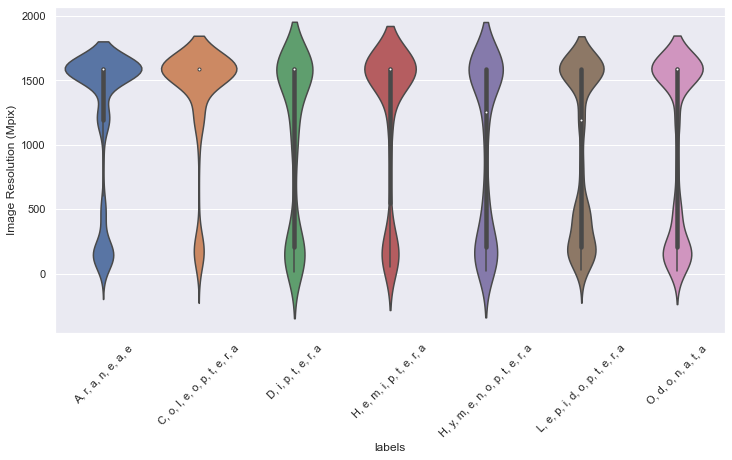

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the list elements to strings
df['labels'] = df['labels'].apply(lambda x: ', '.join(x))

# Create the violin plot
sns.set(rc={'figure.figsize': (12, 6)})
ax = sns.violinplot(x=df['labels'], y=(df['width'] * df['height'] / 1e4))

# Set x-axis tick labels at a 45-degree angle
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add units to the y-axis
ax.set_ylabel('Image Resolution (Mpix)')

# Show the plot
plt.show()

### Image Size Frequency Analysis - ArTaxOr

              Mpix Range  Frequency
0      (16.773, 112.914]       1053
1     (112.914, 207.077]       1424
2     (207.077, 301.241]       5224
3     (301.241, 395.404]       4948
4     (395.404, 489.568]        429
5     (489.568, 583.732]         88
6     (583.732, 677.895]        255
7     (677.895, 772.059]         68
8     (772.059, 866.222]        122
9     (866.222, 960.386]         59
10    (960.386, 1054.55]         97
11   (1054.55, 1148.713]         36
12  (1148.713, 1242.877]        454
13   (1242.877, 1337.04]         29
14   (1337.04, 1431.204]         48
15  (1431.204, 1525.368]         27
16  (1525.368, 1619.531]        201
17  (1619.531, 1713.695]         16
18  (1713.695, 1807.858]        772
19  (1807.858, 1902.022]          8
20  (1902.022, 1996.186]         18


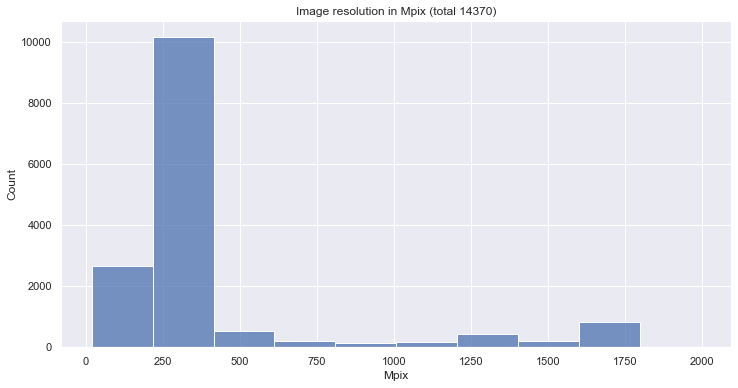

In [29]:
import os
import pandas as pd
from PIL import Image
import seaborn as sns

# Set the path to your dataset
BASE_PATH = "C:\\kaggle\\input\\ArTaxOr"

# Step 1: Image Preprocessing
image = []
labels = []
widths = []
heights = []

for root, dirs, files in os.walk(BASE_PATH):
    for file in files:
        if file.endswith(".jpg"):
            label = os.path.basename(root)
            image_path = os.path.join(root, file)

            # Open the image to get its size
            with Image.open(image_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)

            image.append(file)
            labels.append(label)

# Create the main DataFrame
data = {'Images': image, 'labels': labels, 'width': widths, 'height': heights}
df2 = pd.DataFrame(data)

# Compute the image resolution in Mpix
df2['Mpix'] = df2['width'] * df2['height'] / 1e4

# Plot the distribution analysis
histogram_plot = sns.histplot(df2['Mpix'], bins=10, kde=False)
histogram_plot.set_title('Image resolution in Mpix (total {})'.format(len(df)))

# Generate a frequency table
frequency_table = pd.cut(df2['Mpix'], bins=21).value_counts().sort_index().reset_index()
frequency_table.columns = ['Mpix Range', 'Frequency']
print(frequency_table)


### Violin Plot - ArTaxOr

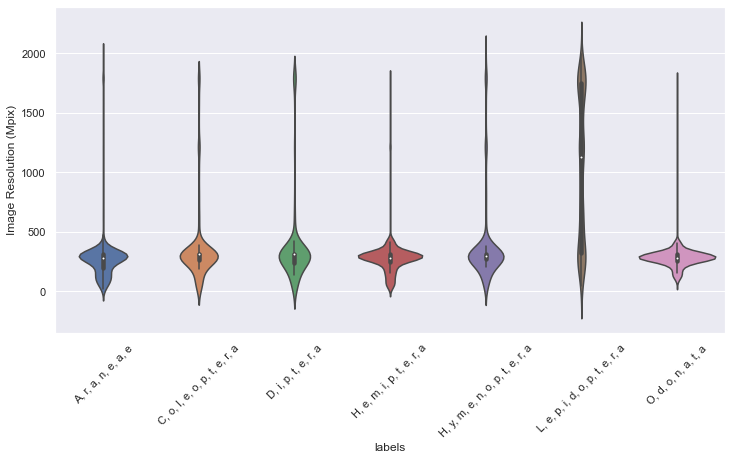

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the list elements to strings
df2['labels'] = df2['labels'].apply(lambda x: ', '.join(x))

# Create the violin plot
sns.set(rc={'figure.figsize': (12, 6)})
ax = sns.violinplot(x=df2['labels'], y=(df2['width'] * df2['height'] / 1e4))

# Set x-axis tick labels at a 45-degree angle
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add units to the y-axis
ax.set_ylabel('Image Resolution (Mpix)')

# Show the plot
plt.show()